In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Dataset (3).csv")
df.head()

,YEAR,National Waterways- I,National Waterways- II,National Waterways-III,Total
0,2003-04,1596,296,219,2111
1,2004-05,3119,381,154,3654
2,2005-06,4109,322,169,4600
3,2006-07,5803,1728,149,7680
4,2007-08,7092,422,89,7603


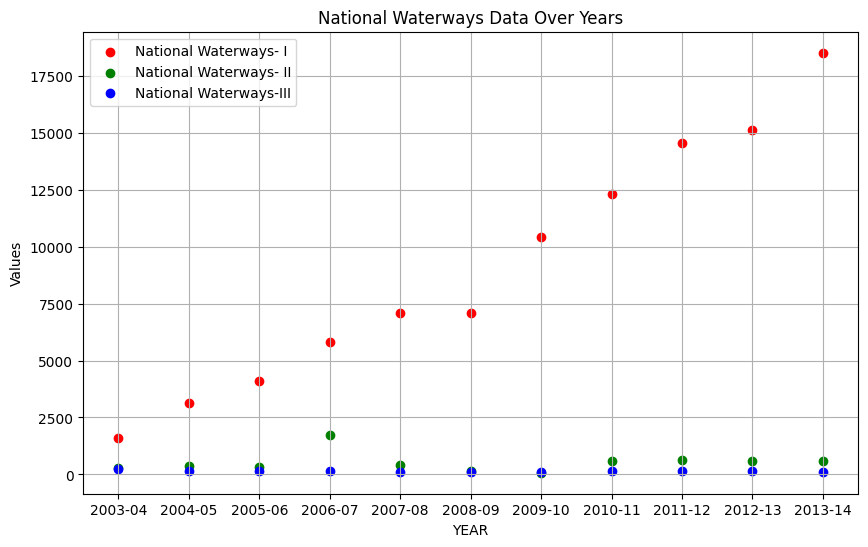

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(df['YEAR'], df['National Waterways- I'], color='r', label='National Waterways- I')
plt.scatter(df['YEAR'], df['National Waterways- II'], color='g', label='National Waterways- II')
plt.scatter(df['YEAR'], df['National Waterways-III'], color='b', label='National Waterways-III')

plt.xlabel('YEAR')
plt.ylabel('Values')
plt.title('National Waterways Data Over Years')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df.shape

(11, 5)

##**Step 1: Calculating the mean values**

In [ ]:
mean_1 = np.mean(df['National Waterways- I'])
mean_2 = np.mean(df['National Waterways- II'])
mean_3 = np.mean(df['National Waterways-III'])
mean_1, mean_2, mean_3

(9060.727272727272, 520.4545454545455, 137.72727272727272)

##**Step 2: Creating k Matrix**

In [ ]:
values1 = df['National Waterways- I'].apply(lambda x: (x-mean_1))
values2 = df['National Waterways- II'].apply(lambda y: (y-mean_2))
values3 = df['National Waterways-III'].apply(lambda z: (z-mean_3))

In [ ]:
k = pd.DataFrame()
k["x"] = values1
k["y"] = values2
k["z"] = values3
k

,x,y,z
0,-7464.727273,-224.454545,81.272727
1,-5941.727273,-139.454545,16.272727
2,-4951.727273,-198.454545,31.272727
3,-3257.727273,1207.545455,11.272727
4,-1968.727273,-98.454545,-48.727273
5,-1992.727273,-378.454545,-28.727273
6,1341.272727,-446.454545,-40.727273
7,3241.272727,52.545455,4.272727
8,5485.272727,92.545455,-5.727273
9,6058.272727,59.545455,1.272727


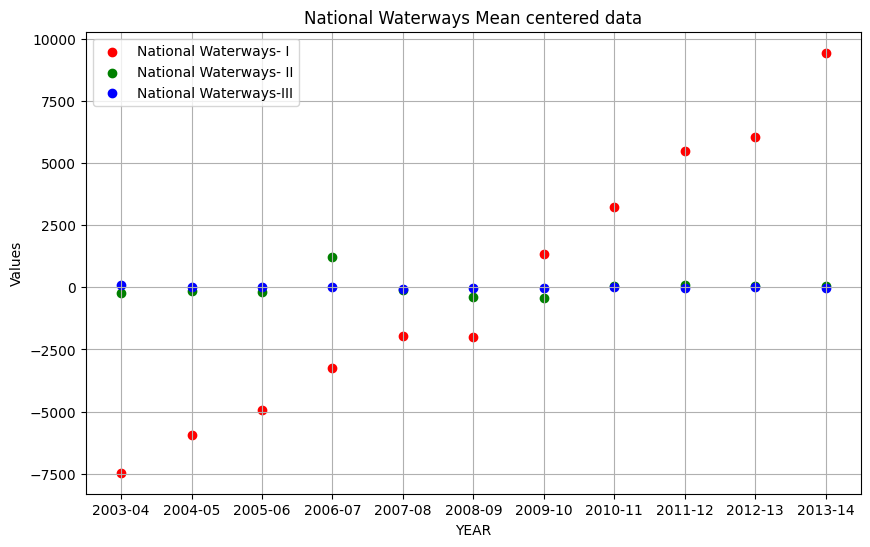

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(df['YEAR'], k["x"], color='r', label='National Waterways- I')
plt.scatter(df['YEAR'], k["y"], color='g', label='National Waterways- II')
plt.scatter(df['YEAR'], k["z"], color='b', label='National Waterways-III')

plt.xlabel('YEAR')
plt.ylabel('Values')
plt.title('National Waterways Mean centered data')
plt.legend()
plt.grid(True)
plt.show()

##**Step 3:  Covariance Matrix**

In [ ]:
def cal_var(data, mean):
  cal=0
  for i in data:
    cal += (i-mean)**2
  return cal/(len(data)-1)

var_x = round(cal_var(k['x'], np.mean(k['x'])))
var_y = round(cal_var(k['y'], np.mean(k['y'])))
var_z = round(cal_var(k['z'], np.mean(k['z'])))
var_x, var_y, var_z

(30242782, 193990, 1336)

In [ ]:
def cal_cov_var(data_1, mean_1, data_2, mean_2):
  cal=0
  n = len(data_1)
  for i in range(n):
    cal += (data_1[i]-mean_1)*(data_2[i]-mean_2)
  return cal/(n-1)

cov_xy = round(cal_cov_var(k['x'], np.mean(k['x']),k['y'], np.mean(k['y'])))
cov_yz = round(cal_cov_var(k['y'], np.mean(k['y']),k['z'], np.mean(k['z'])))
cov_xz = round(cal_cov_var(k['x'], np.mean(k['x']),k['z'], np.mean(k['z'])))
cov_xy, cov_yz, cov_xz

(163589, 1892, -101160)

In [ ]:
cov_matrix = pd.DataFrame([[var_x, cov_xy, cov_xz], [cov_xy, var_y, cov_yz], [cov_xz, cov_yz, var_z]])
cov_matrix.index = ['National Waterways- I', 'National Waterways- II', 'National Waterways-III']
cov_matrix.columns = ['National Waterways- I', 'National Waterways- II', 'National Waterways-III']
cov_matrix

,National Waterways- I,National Waterways- II,National Waterways-III
National Waterways- I,30242782,163589,-101160
National Waterways- II,163589,193990,1892
National Waterways-III,-101160,1892,1336


##**Step 4: Find Eigenvalues and Eigenvectors**

In [ ]:
eig_val, eig_vec = np.linalg.eig(cov_matrix)
print("Eigen vectors ", eig_vec)
print("Eigen values ", eig_val, "\n")

Eigen vectors  [[ 0.99997959  0.00540064  0.00341341]
 [ 0.00544357 -0.99990461 -0.01269398]
 [-0.00334453 -0.0127123   0.9999136 ]]
Eigen values  [3.02440109e+07 1.93130484e+05 9.66650065e+02] 



##**Step 5: Finding the percentage of each eigen value** **bold text**

In [ ]:
Trace_of_eigenvalues = sum(eig_val)
print("Trace of eigenvalues = ", Trace_of_eigenvalues)

Trace of eigenvalues =  30438108.000000007


In [ ]:
lambda1 = eig_val[0]/Trace_of_eigenvalues
lambda2 = eig_val[1]/Trace_of_eigenvalues
lambda3 = eig_val[2]/Trace_of_eigenvalues
print(lambda1, lambda2, lambda3)

0.9936232194830317 0.006345022627656815 3.175788931147472e-05


##**Step 6: Final Step**

Z = k_matrix * higher variance vector

In [ ]:
hvv = np.array(eig_vec[:,0]).reshape(3,1)
Z = np.dot(k, hvv)
Z

array([[-7466.06857524],
       [-5942.41956076],
       [-4952.81110456],
       [-3251.12513071],
       [-1969.06006626],
       [-1994.65066615],
       [ 1338.95126076],
       [ 3241.4783194 ],
       [ 5485.68370881],
       [ 6058.46896476],
       [ 9451.55284996]])

##**Final Reduced Matrix**

In [ ]:
data = pd.DataFrame(df['YEAR'])
data['Z'] = Z
data

,YEAR,Z
0,2003-04,-7466.068575
1,2004-05,-5942.419561
2,2005-06,-4952.811105
3,2006-07,-3251.125131
4,2007-08,-1969.060066
5,2008-09,-1994.650666
6,2009-10,1338.951261
7,2010-11,3241.478319
8,2011-12,5485.683709
9,2012-13,6058.468965


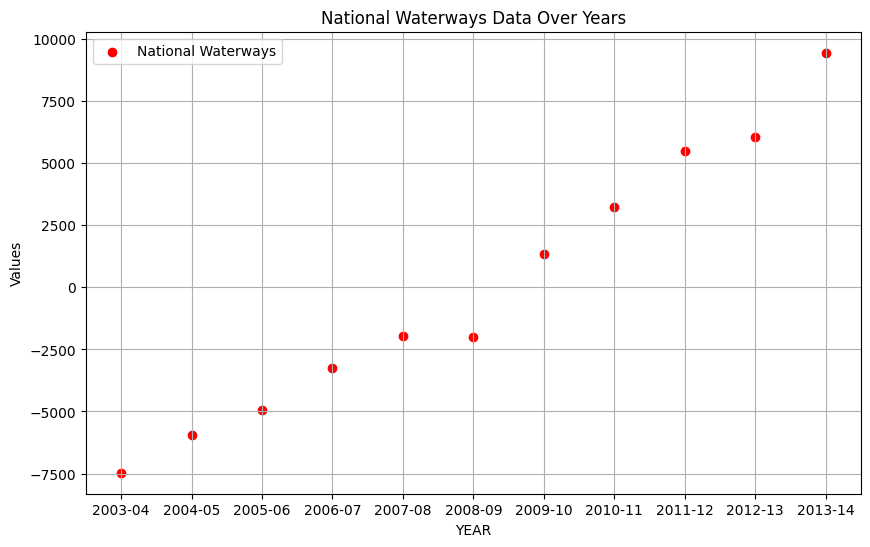

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(data['YEAR'], data['Z'], color='r', label='National Waterways')

plt.xlabel('YEAR')
plt.ylabel('Values')
plt.title('National Waterways Data Over Years')
plt.legend()
plt.grid(True)
plt.show()